In [ ]:
def PolyKernelMatrix(d):
  kernel_mat = []
  for i in range(len(df)):
    ker = []
    for j in range(len(df)):
      val=0
      for k  in range(df.shape[1]):
        val = val+df.iloc[i][k] * df.iloc[j][k]
        # print(df.iloc[i][k] * df.iloc[j][k]  + 1)
      val=val+1
      val=val**d
      ker.append(val)
        # print(x[i][k] , xt[k][j])
      # print('mul ', mul)
    kernel_mat.append(ker)
  kernel = pd.DataFrame(kernel_mat)
  return kernel

In [ ]:
def Exponential_Kernel(sigma):
  kernel_ex = []
  for i in range(len(df)):
    ex1 = []
    for j in range(len(df)):
      a, b = df.iloc[i], df.iloc[j]
      X = np.subtract(a,b)
      X_T = np.transpose(X)
      num = np.dot(X,X_T)
      den = 2 * sigma * sigma
      ex1.append(num/den)
    kernel_ex.append(ex1)
  kernel_ex = np.array(kernel_ex)
  kernel_ex = np.negative(kernel_ex)
  kernel_ex = np.exp(kernel_ex)
  return kernel_ex

In [ ]:
import pandas as pd
import numpy as np

#Connecting to the Google Drive.
from google.colab import drive
drive.mount('/content/drive')

#Reading the data.
url = '/content/drive/MyDrive/Colab Notebooks/Dataset.csv'
df=pd.read_csv(url)
# df._get_value(0 , 'A')

df

Mounted at /content/drive


,A,B
0,0.14300,0.98493
1,-0.30467,0.98562
2,0.46625,-0.84003
3,0.94847,0.37222
4,-0.96871,-0.26697
...,...,...
995,4.48210,-7.40030
996,-3.49630,8.63860
997,6.10620,-5.98640
998,-7.40940,-5.52050


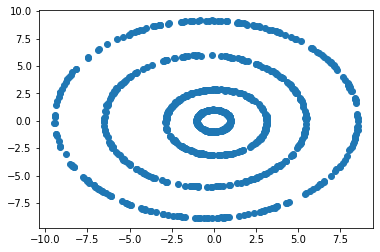

In [ ]:
#Plotting the original Graph
import matplotlib.pyplot as plt
plt.scatter(df['A'], df['B'])

In [ ]:
#Initialization
def Initialization(df,Z, k):
  import random
  centroid = []
  # print(Z)
  for i in range(k):
    r = random.randint(0,len(df))
    Z[r] = i+1
    centroid.append(df.iloc[r])
    # print(r)
  return Z , centroid

In [ ]:
def EuclideanDist (A , B):
  sum = 0
  for i in range(len(A)):
    diff = A[i] - B[i]
    diff = diff**2
    sum = sum + diff
  return sum


In [ ]:
def CalculateMean(centroid ,Z ,k):
    m = len(centroid[0])
    # print(m)
    centroid = np.zeros((k,m))
    Times = np.zeros(k)
    for i in range(len(df)):
      for j in range(k):
        if Z[i] == (j+1):
          centroid[j] = np.add(centroid[j], df.iloc[i])
          Times[j] = Times[j] + 1
    for j in range(k):
      centroid[j] = np.multiply(centroid[j] , 1 / Times[j])
    return centroid


In [ ]:
def Reassignment(centroid , Z , k):
  isReassign = False
  for i in range(len(df)):
    if Z[i] == 0:
      dist = float(np.Inf)
    else:
      dist = EuclideanDist(centroid[int(Z[i]) - 1], df.iloc[i])
    for j in range(k):
      ED  = EuclideanDist(centroid[j] , df.iloc[i])
      if dist > ED:
        isReassign = True
        dist = ED
        Z[i] = j+1
  return Z ,isReassign

In [ ]:
def PlotGraph(k,df,Z):
  colour = ['Red', 'Green' , 'Cyan' , 'Black' , 'Blue']
  import matplotlib.pyplot as plt
  Plot =  []
  for i in range(0,k):
    Plot1 = []
    for j in range(len(df)):
      if Z[j] == i:
        Plot1.append(df.iloc[j])
    Plot1 = pd.DataFrame(Plot1)
    plt.title('Clustering')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.scatter(Plot1['A'] , Plot1['B'],color=colour[i])

In [ ]:
# def ComputeEigens(kernel_ex,k):
#   eigenvalues, eigenvectors = np.linalg.eig(kernel_ex)
#   idx = eigenvalues.argsort()[::-1]
#   eigenvalues = eigenvalues[idx]
#   # print(eigenvalues)
#   eigenvectors = eigenvectors[:,idx]
#   return eigenvectors[:k]

In [ ]:
#Sorting the Eigen vectors in decresing order of the corresponding Eigen Valules.
def ComputeEigens(kernel_ex, k):
  eigenvalues, eigenvectors = np.linalg.eig(kernel_ex)
  idx = eigenvalues.argsort()[::-1]
  eigenvalues = eigenvalues[idx]
  eigenvectors = eigenvectors[:,idx]
  eigenvector = eigenvectors[:,0:k]
  return eigenvector

In [ ]:
def ComputeMax(kernel, k):
  norm = []
  Z = []
  for i in range(len(df)):
    nrm = []
    for j in range(k):
      nrm.append(kernel[i][j])
    x = np.argmax(nrm)
    Z.append(x)
  return Z

**Checking for Polynomial Kernel**

In [ ]:
k = 4
d = 2
kernel = PolyKernelMatrix(d)

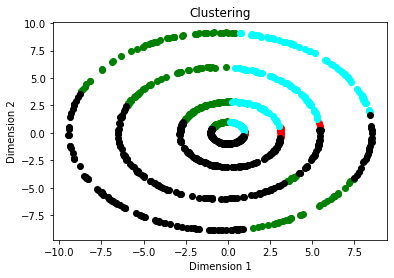

In [ ]:
eig_v = ComputeEigens(kernel, k)
Z = ComputeMax(eig_v, k)
PlotGraph(k, df, Z)

**Checking for Exponential Kernel**

In [ ]:
k = 4
sigma = 0.9
kernel = Exponential_Kernel(sigma)

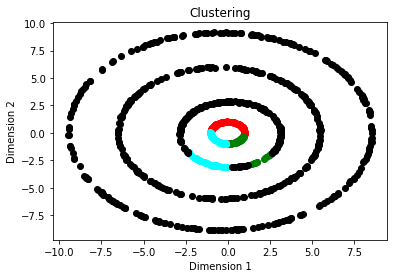

In [ ]:
eig_v = ComputeEigens(kernel, k)
Z = ComputeMax(eig_v, k)
PlotGraph(k, df, Z)